<a href="https://colab.research.google.com/github/Imtinen-Ayari/BookstoreSpringboot/blob/master/Datacollecting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objectif 1 : Reconnaître les mouvements (via caméra en temps réel)


---


Besoin : Détecter les articulations du corps et reconnaître les postures en temps réel via la caméra.

Dataset:
Yoga-16  (Kaggle) – Images de postures annotées.



In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"imtinenayari","key":"7f135309fc436b5330167525291174bb"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list -s yoga

ref                                                           title                                                 size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  --------------------------------------------------  ------  -------------------  -------------  ---------  ---------------  
tr1gg3rtrash/yoga-posture-dataset                             Yoga Posture Dataset                                 447MB  2022-09-05 04:18:35           5055         83  0.875            
niharika41298/yoga-poses-dataset                              Yoga Poses Dataset                                   288MB  2020-10-14 09:18:41           9426        115  0.75             
ujjwalchowdhury/yoga-pose-classification                      Yoga Pose Classification                              15MB  2022-06-05 14:46:16           2269         60  0.875            
mohiuddin2531/yoga-16                                         Yog

In [5]:
# Telechargement de dataset Yoga-16 –  dataset récent pour l’analyse des postures et la détection d’erreurs.
!kaggle datasets download -d mohiuddin2531/yoga-16
!unzip yoga-16.zip -d dataset_yoga16


Dataset URL: https://www.kaggle.com/datasets/mohiuddin2531/yoga-16
License(s): MIT
 99% 539M/544M [00:05<00:00, 108MB/s]
100% 544M/544M [00:05<00:00, 105MB/s]
Archive:  yoga-16.zip
  inflating: dataset_yoga16/yoga16-dataset/test/chair_pose/Chair_Pose_or_Utkatasana__image_18.jpg  
  inflating: dataset_yoga16/yoga16-dataset/test/chair_pose/Chair_Pose_or_Utkatasana__image_3.jpg  
  inflating: dataset_yoga16/yoga16-dataset/test/chair_pose/Chair_Pose_or_Utkatasana__image_306.jpg  
  inflating: dataset_yoga16/yoga16-dataset/test/chair_pose/Chair_Pose_or_Utkatasana__image_40.jpg  
  inflating: dataset_yoga16/yoga16-dataset/test/chair_pose/Chair_Pose_or_Utkatasana__image_5.jpg  
  inflating: dataset_yoga16/yoga16-dataset/test/chair_pose/Chair_Pose_or_Utkatasana__image_53.jpg  
  inflating: dataset_yoga16/yoga16-dataset/test/chair_pose/Chair_Pose_or_Utkatasana__image_55.jpg  
  inflating: dataset_yoga16/yoga16-dataset/test/chair_pose/Chair_Pose_or_Utkatasana__image_6.jpg  
  inflating: dataset_

# Nettoyage et Prétraitement du Dataset Yoga-16 :

In [10]:
import os

# Chemin vers le dataset
dataset_path = "/content/dataset_yoga16/yoga16-dataset"

# Parcours les ensembles (train, test, valid)
for subset in ["train", "test", "valid"]:
    subset_path = os.path.join(dataset_path, subset)
    print(f"📂 {subset}:")

    if os.path.exists(subset_path):
        for class_name in sorted(os.listdir(subset_path)):  # Ex: chair_pose, tree_pose
            class_path = os.path.join(subset_path, class_name)

            if os.path.isdir(class_path):
                num_images = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
                print(f"🔹 {class_name}: {num_images} images")
    print("\n")


📂 train:
🔹 chair_pose: 56 images
🔹 dolphin_plank_pose: 56 images
🔹 downward-facing_dog_pose: 56 images
🔹 fish_pose: 56 images
🔹 goddess_pose: 56 images
🔹 locust_pose: 56 images
🔹 lord_of_the_dance_pose: 56 images
🔹 low_lunge_pose: 56 images
🔹 seated_forward_bend_pose: 56 images
🔹 side_plank_pose: 56 images
🔹 staff_pose: 56 images
🔹 tree_pose: 56 images
🔹 warrior_1_pose: 56 images
🔹 warrior_2_pose: 56 images
🔹 warrior_3_pose: 56 images
🔹 wide-angle_seated_forward_bend_pose: 56 images


📂 test:
🔹 chair_pose: 16 images
🔹 dolphin_plank_pose: 16 images
🔹 downward-facing_dog_pose: 16 images
🔹 fish_pose: 16 images
🔹 goddess_pose: 16 images
🔹 locust_pose: 16 images
🔹 lord_of_the_dance_pose: 16 images
🔹 low_lunge_pose: 16 images
🔹 seated_forward_bend_pose: 16 images
🔹 side_plank_pose: 16 images
🔹 staff_pose: 16 images
🔹 tree_pose: 16 images
🔹 warrior_1_pose: 16 images
🔹 warrior_2_pose: 16 images
🔹 warrior_3_pose: 16 images
🔹 wide-angle_seated_forward_bend_pose: 16 images


📂 valid:
🔹 chair_pose

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Définir les paramètres
IMAGE_SIZE = (224, 224)  # Taille standard pour les modèles CNN
dataset_path = "/content/dataset_yoga16/yoga16-dataset/train"

# Exemple : Charger et prétraiter 1 image de chaque classe
preprocessed_images = []

for class_name in sorted(os.listdir(dataset_path)):
    class_path = os.path.join(dataset_path, class_name)

    if os.path.isdir(class_path):
        image_files = os.listdir(class_path)

        if image_files:
            image_path = os.path.join(class_path, image_files[0])  # Charger une image exemple

            # Charger l'image
            image = load_img(image_path, target_size=IMAGE_SIZE)
            image = img_to_array(image)  # Convertir en numpy array
            image = image / 255.0  # Normaliser entre 0 et 1

            preprocessed_images.append(image)
            print(f"✅ {class_name} → Image chargée et normalisée.")

# Conversion en numpy array
preprocessed_images = np.array(preprocessed_images)


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Générateurs d'images pour entraînement et validation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalisation
    rotation_range=20,  # Rotation aléatoire des images pour augmenter la diversité
    width_shift_range=0.2,  # Décalage horizontal
    height_shift_range=0.2,  # Décalage vertical
    horizontal_flip=True,  # Retourner les images pour générer plus de données
    validation_split=0.2  # 20% des données seront utilisées pour la validation
)

# Chargement des images en batch
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

print(f"✅ {train_generator.samples} images d'entraînement.")
print(f"✅ {val_generator.samples} images de validation.")


Found 720 images belonging to 16 classes.
Found 176 images belonging to 16 classes.
✅ 720 images d'entraînement.
✅ 176 images de validation.


#Objectif 2: Comparer la posture de l'utilisateur avec une posture correcte et suggérer des corrections.


---


Besoin : Comparer la posture de l'utilisateur avec une posture correcte et suggérer des corrections.

Dataset :
Yoga Pose Image Classification Dataset


In [29]:
# Telechargement de dataset Yoga Pose Image Classification Dataset – Images de postures annotées.
!kaggle datasets download -d shrutisaxena/yoga-pose-image-classification-dataset
!unzip yoga-pose-image-classification-dataset.zip -d dataset_yoga_classification


Streaming output truncated to the last 5000 lines.
  inflating: dataset_yoga_classification/dataset/bharadvajasana i/11-1.png  
  inflating: dataset_yoga_classification/dataset/bharadvajasana i/14-0.png  
  inflating: dataset_yoga_classification/dataset/bharadvajasana i/15-0.png  
  inflating: dataset_yoga_classification/dataset/bharadvajasana i/18-0.png  
  inflating: dataset_yoga_classification/dataset/bharadvajasana i/18-1.png  
  inflating: dataset_yoga_classification/dataset/bharadvajasana i/19-0.png  
  inflating: dataset_yoga_classification/dataset/bharadvajasana i/2-0.png  
  inflating: dataset_yoga_classification/dataset/bharadvajasana i/20-0.png  
  inflating: dataset_yoga_classification/dataset/bharadvajasana i/21-0.png  
  inflating: dataset_yoga_classification/dataset/bharadvajasana i/22-0.png  
  inflating: dataset_yoga_classification/dataset/bharadvajasana i/23-0.png  
  inflating: dataset_yoga_classification/dataset/bharadvajasana i/24-0.png  
  inflating: dataset_yoga_

# Nettoyage et Prétraitement du Dataset Yoga Classification

In [30]:
import os

dataset_path = 'dataset_yoga_classification/dataset'
poses = os.listdir(dataset_path)  # Liste les sous-dossiers
print(poses)
pose_folders = [folder for folder in poses if os.path.isdir(os.path.join(dataset_path, folder))]  # Filtrer pour ne garder que les sous-dossiers
number_of_poses = len(pose_folders)  # Compter le nombre de sous-dossiers

print(f"Il y a {number_of_poses} poses différentes dans le dataset.")


['bhujapidasana', 'uttana shishosana', 'parighasana', 'garbha pindasana', 'salamba sirsasana', 'janu sirsasana', 'uttanasana', 'virasana', 'utthita hasta padangustasana', 'utthita parsvakonasana', 'pasasana', 'astavakrasana', 'virabhadrasana iii', 'padangusthasana', 'dandasana', 'bhairavasana', 'purvottanasana', 'agnistambhasana', 'tolasana', 'salabhasana', 'kapotasana', 'baddha konasana', 'kurmasana', 'ardha chandrasana', 'dwi pada viparita dandasana', 'ardha uttanasana', 'mayurasana', 'eka pada rajakapotasana ii', 'adho mukha vriksasana', 'chaturanga dandasana', 'supta baddha konasana', 'eka pada koundinyanasana i', 'ustrasana', 'lolasana', 'bharadvajasana i', 'tittibhasana', 'ardha pincha mayurasana', 'marichyasana iii', 'chakravakasana', 'salamba sarvangasana', 'ardha bhekasana', 'vrischikasana', 'supta virasana', 'dhanurasana', 'pincha mayurasana', 'yoganidrasana', 'parivrtta janu sirsasana', 'bhujangasana', 'makara adho mukha svanasana', 'upavistha konasana', 'virabhadrasana i', 

In [22]:
from PIL import Image

def check_images(dataset_path):
    for pose in os.listdir(dataset_path):
        pose_path = os.path.join(dataset_path, pose)
        if os.path.isdir(pose_path):
            for img_file in os.listdir(pose_path):
                img_path = os.path.join(pose_path, img_file)
                try:
                    img = Image.open(img_path)
                    img.verify()  # Vérifie si l'image est valide
                except (IOError, SyntaxError) as e:
                    print(f"Image invalide : {img_path}")

check_images(dataset_path)


In [33]:
import os
from PIL import Image

def is_valid_image(file_path):
    """Vérifie si un fichier est une image valide"""
    try:
        with Image.open(file_path) as img:
            img.verify()  # Vérifie si c'est une vraie image
        return True
    except:
        return False  # Si l'ouverture échoue, ce n'est pas une image valide

def resize_images(dataset_path, target_size=(224, 224)):
    for pose in os.listdir(dataset_path):
        pose_path = os.path.join(dataset_path, pose)
        if os.path.isdir(pose_path):
            for img_file in os.listdir(pose_path):
                img_path = os.path.join(pose_path, img_file)

                if not is_valid_image(img_path):  # Ignore les fichiers corrompus
                    print(f"⚠️ Image invalide ignorée : {img_path}")
                    continue

                try:
                    with Image.open(img_path) as img:
                        img = img.convert("RGB")  # Convertir en RGB si nécessaire
                        img = img.resize(target_size)
                        img.save(img_path)  # Remplacer l'image originale
                        print(f"✅ Image redimensionnée : {img_path}")
                except Exception as e:
                    print(f"❌ Erreur sur {img_path}: {e}")

resize_images("dataset_yoga_classification/dataset")


Streaming output truncated to the last 5000 lines.
✅ Image redimensionnée : dataset_yoga_classification/dataset/tolasana/39-0.png
✅ Image redimensionnée : dataset_yoga_classification/dataset/tolasana/43-0.png
✅ Image redimensionnée : dataset_yoga_classification/dataset/tolasana/48-0.png
✅ Image redimensionnée : dataset_yoga_classification/dataset/tolasana/32-0.png
✅ Image redimensionnée : dataset_yoga_classification/dataset/tolasana/57-0.png
✅ Image redimensionnée : dataset_yoga_classification/dataset/tolasana/52-0.png
✅ Image redimensionnée : dataset_yoga_classification/dataset/tolasana/84-0.png
✅ Image redimensionnée : dataset_yoga_classification/dataset/tolasana/76-0.png
✅ Image redimensionnée : dataset_yoga_classification/dataset/salabhasana/30-0.png
✅ Image redimensionnée : dataset_yoga_classification/dataset/salabhasana/70-0.png
✅ Image redimensionnée : dataset_yoga_classification/dataset/salabhasana/28-0.png
✅ Image redimensionnée : dataset_yoga_classification/dataset/salabhasan

In [35]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def normalize_images(dataset_path, target_size=(224, 224)):
    images = []
    labels = []
    valid_extensions = ('.jpg', '.jpeg', '.png')  # Extensions valides

    for pose in os.listdir(dataset_path):
        pose_path = os.path.join(dataset_path, pose)
        if os.path.isdir(pose_path):
            for img_file in os.listdir(pose_path):
                img_path = os.path.join(pose_path, img_file)

                # Vérifie que le fichier a une extension valide
                if not img_file.lower().endswith(valid_extensions):
                    print(f"Fichier ignoré (non image) : {img_path}")
                    continue

                try:
                    img = load_img(img_path, target_size=target_size)
                    img_array = img_to_array(img) / 255.0  # Normalisation
                    images.append(img_array)
                    labels.append(pose)
                except Exception as e:
                    print(f"Image invalide ignorée : {img_path} -> {e}")

    images = np.array(images)
    labels = np.array(labels)
    return images, labels

images, labels = normalize_images(dataset_path)
print(f"Nombre d'images chargées : {len(images)}")


Image invalide ignorée : dataset_yoga_classification/dataset/baddha konasana/75. 1jyyrgb.jpg -> cannot identify image file <_io.BytesIO object at 0x7d2dbd8a6160>
Image invalide ignorée : dataset_yoga_classification/dataset/baddha konasana/29. .jpg -> cannot identify image file <_io.BytesIO object at 0x7d2dbd9b14e0>
Image invalide ignorée : dataset_yoga_classification/dataset/baddha konasana/49. chqeifmstwc52i4rkdhp.jpg -> cannot identify image file <_io.BytesIO object at 0x7d2dbd8a6160>
Image invalide ignorée : dataset_yoga_classification/dataset/baddha konasana/14. 4276901736001_4750039139001_4750038181001-vs.jpg -> cannot identify image file <_io.BytesIO object at 0x7d2dbd9b14e0>
Fichier ignoré (non image) : dataset_yoga_classification/dataset/virabhadrasana i/File62.gif
Fichier ignoré (non image) : dataset_yoga_classification/dataset/ashtanga namaskara/10. ashtanga-namaskara.jpe
Image invalide ignorée : dataset_yoga_classification/dataset/tadasana/93. main-qimg-2d4198a120b99707dfb8d

In [36]:
from PIL import Image

def remove_invalid_images(dataset_path):
    for pose in os.listdir(dataset_path):
        pose_path = os.path.join(dataset_path, pose)
        if os.path.isdir(pose_path):
            for img_file in os.listdir(pose_path):
                img_path = os.path.join(pose_path, img_file)

                # Vérifie l'extension
                if not img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                    print(f"Suppression : {img_path} (format invalide)")
                    os.remove(img_path)
                    continue

                # Vérifie l'intégrité du fichier image
                try:
                    with Image.open(img_path) as img:
                        img.verify()  # Vérifie si l'image est valide
                except Exception as e:
                    print(f"Suppression d'image corrompue : {img_path} -> {e}")
                    os.remove(img_path)  # Supprime l'image si elle est corrompue

remove_invalid_images(dataset_path)


Suppression d'image corrompue : dataset_yoga_classification/dataset/baddha konasana/75. 1jyyrgb.jpg -> cannot identify image file 'dataset_yoga_classification/dataset/baddha konasana/75. 1jyyrgb.jpg'
Suppression d'image corrompue : dataset_yoga_classification/dataset/baddha konasana/29. .jpg -> cannot identify image file 'dataset_yoga_classification/dataset/baddha konasana/29. .jpg'
Suppression d'image corrompue : dataset_yoga_classification/dataset/baddha konasana/49. chqeifmstwc52i4rkdhp.jpg -> cannot identify image file 'dataset_yoga_classification/dataset/baddha konasana/49. chqeifmstwc52i4rkdhp.jpg'
Suppression d'image corrompue : dataset_yoga_classification/dataset/baddha konasana/14. 4276901736001_4750039139001_4750038181001-vs.jpg -> cannot identify image file 'dataset_yoga_classification/dataset/baddha konasana/14. 4276901736001_4750039139001_4750038181001-vs.jpg'
Suppression : dataset_yoga_classification/dataset/virabhadrasana i/File62.gif (format invalide)
Suppression : data

In [38]:
import os

# Vérifier si le dossier existe, sinon le créer
augmented_dir = 'augmented_images'
if not os.path.exists(augmented_dir):
    os.makedirs(augmented_dir)

# Génération des images augmentées
img = images[0].reshape((1, *images[0].shape))  # Reshaper l'image
i = 0
for batch in datagen.flow(img, batch_size=1, save_to_dir=augmented_dir, save_prefix='aug', save_format='jpeg'):
    i += 1
    if i > 20:  # Limite le nombre d'images générées
        break


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, stratify=labels)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(4780, 224, 224, 3) (1196, 224, 224, 3) (4780,) (1196,)


\#  Objectif 3 : Recommandation des postures adaptées



---
Besoin : Proposer des postures en fonction des préférences et de l’analyse des mouvements.

Dataset : Yoga Posture Dataset



In [40]:
# Telechargement de dataset Yoga Posture Dataset – Images de postures annotées.
!kaggle datasets download -d tr1gg3rtrash/yoga-posture-dataset
!unzip yoga-posture-dataset.zip -d dataset_yoga


Dataset URL: https://www.kaggle.com/datasets/tr1gg3rtrash/yoga-posture-dataset
License(s): CC0-1.0
 97% 434M/447M [00:06<00:00, 115MB/s] 
100% 447M/447M [00:06<00:00, 68.4MB/s]
Archive:  yoga-posture-dataset.zip
  inflating: dataset_yoga/Adho Mukha Svanasana/File1.png  
  inflating: dataset_yoga/Adho Mukha Svanasana/File10.png  
  inflating: dataset_yoga/Adho Mukha Svanasana/File11.png  
  inflating: dataset_yoga/Adho Mukha Svanasana/File12.png  
  inflating: dataset_yoga/Adho Mukha Svanasana/File13.png  
  inflating: dataset_yoga/Adho Mukha Svanasana/File14.png  
  inflating: dataset_yoga/Adho Mukha Svanasana/File15.png  
  inflating: dataset_yoga/Adho Mukha Svanasana/File16.png  
  inflating: dataset_yoga/Adho Mukha Svanasana/File17.png  
  inflating: dataset_yoga/Adho Mukha Svanasana/File18.png  
  inflating: dataset_yoga/Adho Mukha Svanasana/File19.png  
  inflating: dataset_yoga/Adho Mukha Svanasana/File2.png  
  inflating: dataset_yoga/Adho Mukha Svanasana/File20.png  
  inflatin

In [43]:
import os

dataset_path = "/content/dataset_yoga"

# Liste des poses (classes)
classes = os.listdir(dataset_path)
print("📂 Classes détectées :", classes)

# Compter le nombre d'images par classe
for cls in classes:
    path = os.path.join(dataset_path, cls)
    if os.path.isdir(path):
        print(f"📸 {cls} : {len(os.listdir(path))} images")


📂 Classes détectées : ['Baddha Konasana', 'Eka Pada Rajakapotasana', 'Balasana', 'Supta Kapotasana', 'Hanumanasana', 'Pincha Mayurasana', 'Anjaneyasana', 'Trikonasana', 'Malasana', 'Bakasana', 'Padmasana', 'Poses.json', 'Ardha Chandrasana', 'Adho Mukha Svanasana', 'Ashta Chandrasana', 'Vrksasana', 'Ardha Pincha Mayurasana', 'Setu Bandha Sarvangasana', 'Vasisthasana', 'Salamba Bhujangasana', 'Paschimottanasana', 'Garudasana', 'Urdhva Mukha Svsnssana', 'Utthita Parsvakonasana', 'Navasana', 'Uttanasana', 'Urdhva Dhanurasana', 'Virabhadrasana One', 'Utthita Hasta Padangusthasana', 'Alanasana', 'Parsva Virabhadrasana', 'Phalakasana', 'Salamba Sarvangasana', 'Ardha Matsyendrasana', 'Sivasana', 'Halasana', 'Bitilasana', 'Ardha Navasana', 'Adho Mukha Vrksasana', 'Marjaryasana', 'Dhanurasana', 'Utkatasana', 'Parsvottanasana', 'Virabhadrasana Three', 'Camatkarasana', 'Virabhadrasana Two', 'Upavistha Konasana', 'Ustrasana']
📸 Baddha Konasana : 81 images
📸 Eka Pada Rajakapotasana : 53 images
📸 Bal

In [44]:
import os
from PIL import Image

dataset_path = "/content/dataset_yoga"

# Vérification des images corrompues
for category in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, category)
    if os.path.isdir(class_path):
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            try:
                with Image.open(img_path) as img:
                    img.verify()  # Vérifie si l'image est corrompue
            except Exception as e:
                print(f"Image corrompue détectée : {img_path}, erreur : {e}")


In [45]:
import shutil

for category in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, category)
    if os.path.isdir(class_path):
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            if not img_file.lower().endswith(('.png', '.jpg', '.jpeg')):  # Garder uniquement les images
                print(f"Suppression du fichier non image : {img_path}")
                os.remove(img_path)


Suppression du fichier non image : /content/dataset_yoga/Virabhadrasana One/File56.gif
Suppression du fichier non image : /content/dataset_yoga/Virabhadrasana Two/File56.gif


In [47]:
from PIL import Image
import os

dataset_path = "/content/dataset_yoga"
target_size = (224, 224)  # Taille standard

for category in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, category)
    if os.path.isdir(class_path):
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            try:
                with Image.open(img_path) as img:
                    # Vérifier si l'image a une palette avec transparence
                    if img.mode == "P":
                        img = img.convert("RGBA")  # Convertir en RGBA

                    # Gérer les images avec transparence en remplissant avec du blanc
                    if img.mode == "RGBA":
                        background = Image.new("RGB", img.size, (255, 255, 255))
                        img = Image.alpha_composite(background.convert("RGBA"), img).convert("RGB")

                    # Redimensionner l'image
                    img = img.resize(target_size)

                    # Sauvegarder l'image traitée
                    img.save(img_path)

            except Exception as e:
                print(f"Erreur lors du traitement de {img_path} : {e}")


In [48]:
import random
import shutil

train_ratio = 0.7
valid_ratio = 0.15
test_ratio = 0.15

dataset_cleaned_path = "dataset_cleaned"
os.makedirs(dataset_cleaned_path, exist_ok=True)

for category in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, category)
    if os.path.isdir(class_path):
        images = os.listdir(class_path)
        random.shuffle(images)

        train_split = int(len(images) * train_ratio)
        valid_split = train_split + int(len(images) * valid_ratio)

        for i, img_file in enumerate(images):
            src_path = os.path.join(class_path, img_file)
            if i < train_split:
                dest_path = os.path.join(dataset_cleaned_path, "train", category)
            elif i < valid_split:
                dest_path = os.path.join(dataset_cleaned_path, "valid", category)
            else:
                dest_path = os.path.join(dataset_cleaned_path, "test", category)

            os.makedirs(dest_path, exist_ok=True)
            shutil.copy(src_path, dest_path)


In [49]:
import imgaug.augmenters as iaa

augmenters = iaa.Sequential([
    iaa.Affine(rotate=(-25, 25)),  # Rotation aléatoire
    iaa.Fliplr(0.5),  # Miroir horizontal
    iaa.Multiply((0.8, 1.2)),  # Changement de luminosité
])

for category in os.listdir(dataset_cleaned_path + "/train"):
    class_path = os.path.join(dataset_cleaned_path, "train", category)
    images = os.listdir(class_path)

    if len(images) < 50:  # Si une classe a moins de 50 images
        for img_file in images:
            img_path = os.path.join(class_path, img_file)
            with Image.open(img_path) as img:
                img = img.convert("RGB")
                img_array = np.array(img)
                augmented_image = augmenters(image=img_array)
                new_img = Image.fromarray(augmented_image)
                new_img.save(img_path.replace(".jpg", "_aug.jpg"))


In [50]:
import tensorflow as tf

datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
train_generator = datagen.flow_from_directory(dataset_cleaned_path + "/train", target_size=(224, 224), batch_size=32)
valid_generator = datagen.flow_from_directory(dataset_cleaned_path + "/valid", target_size=(224, 224), batch_size=32)
test_generator = datagen.flow_from_directory(dataset_cleaned_path + "/test", target_size=(224, 224), batch_size=32)


Found 1928 images belonging to 47 classes.
Found 391 images belonging to 47 classes.
Found 456 images belonging to 47 classes.


# Objectif 4 : Importer un dataset pour la suggestion du style de yoga


---
Besoin : Déterminer le style de yoga le plus adapté pour chaque utilisateur.

Dataset : Construire une base de données des styles de yoga en fonction des besoins et préférences de l’utilisateur.
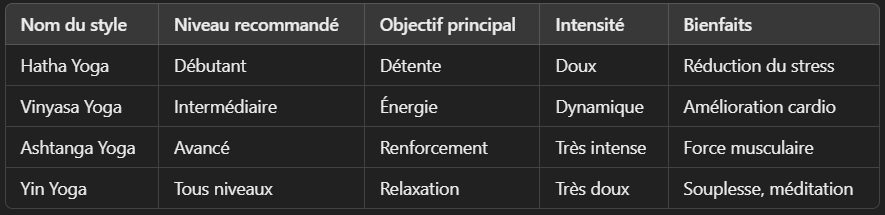



In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.yogajournal.com/yoga-101/types-of-yoga/"  # URL contenant les styles de yoga
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Trouver les titres des styles de yoga
styles = soup.find_all("h2")

# Créer un dataset
yoga_data = []
for style in styles:
    yoga_data.append([style.text.strip()])

# Convertir en DataFrame
df = pd.DataFrame(yoga_data, columns=["Style de Yoga"])
df.to_csv("styles_de_yoga.csv", index=False)

print("✅ Dataset enregistré sous 'styles_de_yoga.csv'")


✅ Dataset enregistré sous 'styles_de_yoga.csv'


In [ ]:
import pandas as pd

# Créer un dataset structuré
data = {
    "Style": ["Hatha", "Vinyasa", "Ashtanga", "Yin", "Kundalini", "Bikram"],
    "Niveau": ["Débutant", "Intermédiaire", "Avancé", "Tous niveaux", "Intermédiaire", "Avancé"],
    "Objectif": ["Détente", "Énergie", "Renforcement", "Relaxation", "Spiritualité", "Détoxification"],
    "Intensité": ["Doux", "Dynamique", "Très intense", "Très doux", "Variable", "Chaud et intense"],
    "Bienfaits": ["Réduction du stress", "Cardio et mobilité", "Force musculaire", "Souplesse et méditation", "Éveil spirituel", "Élimination des toxines"]
}

df = pd.DataFrame(data)
df.to_csv("styles_yoga.csv", index=False)

print("✅ Dataset 'styles_yoga.csv' créé avec succès !")


✅ Dataset 'styles_yoga.csv' créé avec succès !


In [ ]:
df = pd.read_csv("styles_yoga.csv")
print(df.head())

       Style         Niveau      Objectif     Intensité  \
0      Hatha       Débutant       Détente          Doux   
1    Vinyasa  Intermédiaire       Énergie     Dynamique   
2   Ashtanga         Avancé  Renforcement  Très intense   
3        Yin   Tous niveaux    Relaxation     Très doux   
4  Kundalini  Intermédiaire  Spiritualité      Variable   

                 Bienfaits  
0      Réduction du stress  
1       Cardio et mobilité  
2         Force musculaire  
3  Souplesse et méditation  
4          Éveil spirituel  
